# 📚 Understanding Gradients: A Complete Guide

## _From Calculus Foundations to Machine Learning Applications_

---

**Welcome, dear students!** 🎓

This notebook is crafted with love and dedication to help you truly understand **gradients** - one of the most fundamental and powerful concepts in mathematics and machine learning.

### What You Will Learn:

1. **The Intuition** - What is a gradient and why should you care?
2. **Mathematical Foundations** - Building from derivatives to gradients
3. **Visual Understanding** - Seeing gradients in action
4. **Computational Methods** - How computers calculate gradients
5. **Applications in Machine Learning** - The heart of neural networks
6. **Hands-on Practice** - Code it yourself!

> _"The gradient is like a compass that always points to the direction of steepest ascent on a mountain. Understanding it is the key to unlocking the mysteries of optimization."_

---


In [1]:
# 📦 First, let's import all the libraries we'll need
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

print("✅ All libraries loaded successfully!")
print("🎨 Let's explore the beautiful world of gradients!")

/home/shk/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-9lu2182u because there was an issue with the default path (/home/shk/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


✅ All libraries loaded successfully!
🎨 Let's explore the beautiful world of gradients!


---

# Part 1: The Intuition 🧠

## What is a Gradient?

Imagine you're standing on a hill, blindfolded, and you want to reach the top. What would you do?

**You would feel the ground with your feet and take a step in the direction where the ground rises the steepest!**

This is exactly what a **gradient** tells us:
- **Direction**: Which way is "up" (steepest increase)
- **Magnitude**: How steep is the slope

### Real-World Analogies:

| Analogy | The Gradient Tells You |
|---------|----------------------|
| 🏔️ Hiking a mountain | Which direction takes you uphill fastest |
| 🌡️ Temperature map | Where temperature increases most rapidly |
| 💰 Profit landscape | How to adjust parameters to maximize profit |
| 🤖 Neural networks | How to adjust weights to minimize error |

---


---

# Part 2: Mathematical Foundations 📐

## Step 1: The Derivative (1D) - Where It All Begins

Before we understand gradients, we must master the **derivative**.

### The Derivative Tells Us: *Rate of Change*

For a function $f(x)$, the derivative at point $x$ is:

$$f'(x) = \frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

**What this means:**
- Positive derivative → Function is increasing
- Negative derivative → Function is decreasing
- Zero derivative → Function is flat (potential minimum/maximum)

### Common Derivatives to Remember:

| Function $f(x)$ | Derivative $f'(x)$ |
|----------------|-------------------|
| $x^n$ | $nx^{n-1}$ |
| $e^x$ | $e^x$ |
| $\ln(x)$ | $1/x$ |
| $\sin(x)$ | $\cos(x)$ |
| $\cos(x)$ | $-\sin(x)$ |

---


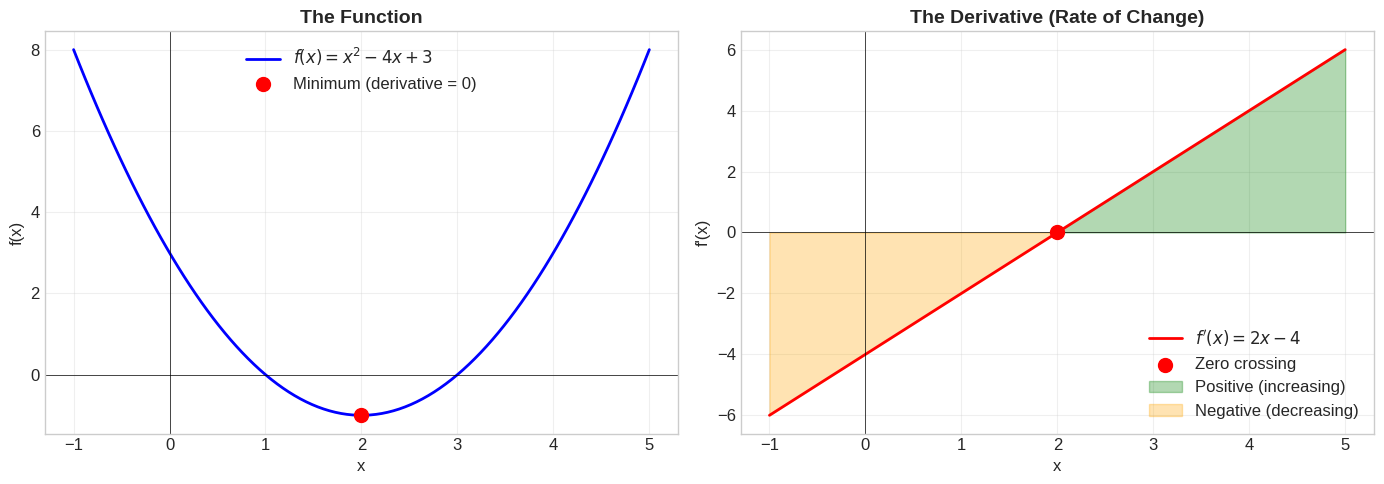


🔑 KEY INSIGHT:
- When derivative is NEGATIVE (orange): function is going DOWN
- When derivative is POSITIVE (green): function is going UP
- When derivative is ZERO: we found a minimum or maximum!


In [2]:
# 📊 Visualizing the Derivative
# Let's see how the derivative (slope) changes at different points

def f(x):
    """Our example function: f(x) = x² - 4x + 3"""
    return x**2 - 4*x + 3

def f_derivative(x):
    """Derivative: f'(x) = 2x - 4"""
    return 2*x - 4

# Create x values
x = np.linspace(-1, 5, 100)

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: The function
ax1 = axes[0]
ax1.plot(x, f(x), 'b-', linewidth=2, label=r'$f(x) = x^2 - 4x + 3$')
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Mark the minimum point
ax1.scatter([2], [f(2)], color='red', s=100, zorder=5, label='Minimum (derivative = 0)')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('The Function', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: The derivative
ax2 = axes[1]
ax2.plot(x, f_derivative(x), 'r-', linewidth=2, label=r"$f'(x) = 2x - 4$")
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

# Mark where derivative is zero
ax2.scatter([2], [0], color='red', s=100, zorder=5, label='Zero crossing')

# Add shading for positive/negative regions
ax2.fill_between(x, f_derivative(x), 0, where=(f_derivative(x) > 0), 
                  alpha=0.3, color='green', label='Positive (increasing)')
ax2.fill_between(x, f_derivative(x), 0, where=(f_derivative(x) < 0), 
                  alpha=0.3, color='orange', label='Negative (decreasing)')

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel("f'(x)", fontsize=12)
ax2.set_title('The Derivative (Rate of Change)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔑 KEY INSIGHT:")
print("- When derivative is NEGATIVE (orange): function is going DOWN")
print("- When derivative is POSITIVE (green): function is going UP")
print("- When derivative is ZERO: we found a minimum or maximum!")

---

## Step 2: Partial Derivatives (Going to Multiple Dimensions!)

When we have a function with **multiple variables** like $f(x, y)$, we need **partial derivatives**.

### Definition:
A partial derivative measures how the function changes when we vary **only one variable** while keeping others constant.

$$\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h, y) - f(x, y)}{h}$$

$$\frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x, y+h) - f(x, y)}{h}$$

### Example:
For $f(x, y) = x^2 + y^2$:
- $\frac{\partial f}{\partial x} = 2x$ (treat $y$ as a constant)
- $\frac{\partial f}{\partial y} = 2y$ (treat $x$ as a constant)

---


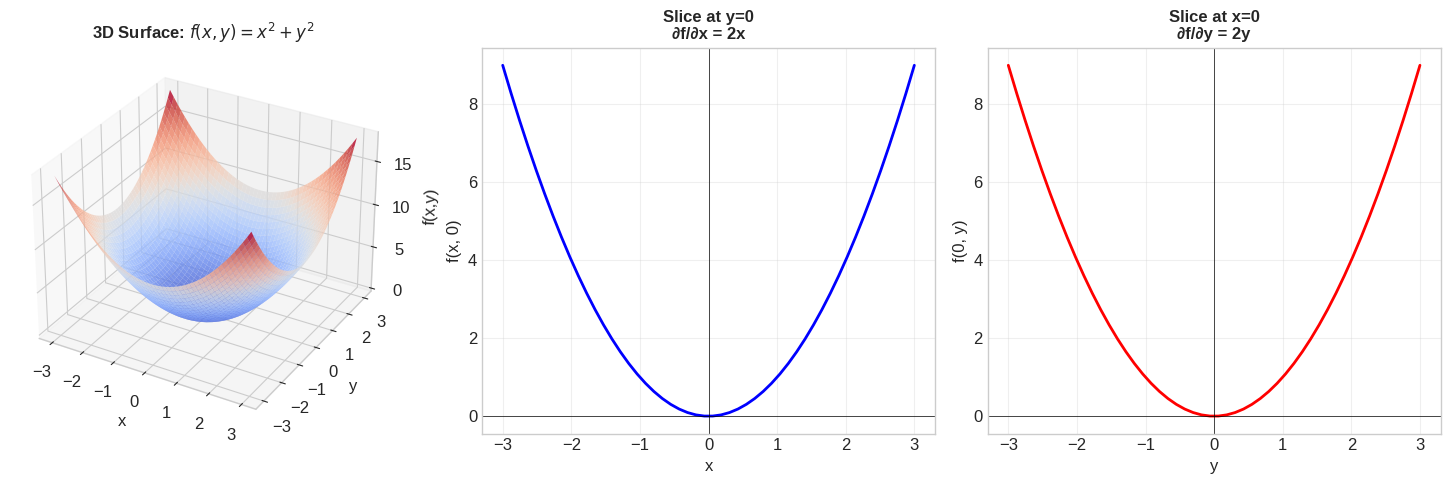


🔑 KEY INSIGHT:
- Partial derivative ∂f/∂x: slope when moving ONLY in x direction
- Partial derivative ∂f/∂y: slope when moving ONLY in y direction
- Each partial derivative is like taking a 'slice' of the surface!


In [3]:
# 📊 Visualizing Partial Derivatives
# Let's see how f(x,y) = x² + y² changes in each direction

def f_2d(x, y):
    """Our 2D function: f(x,y) = x² + y²"""
    return x**2 + y**2

# Create a 3D surface plot
fig = plt.figure(figsize=(15, 5))

# Create mesh grid
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

# Plot 1: 3D Surface
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D Surface: $f(x,y) = x^2 + y^2$', fontsize=12, fontweight='bold')

# Plot 2: Slice along x (fixing y=0) to show ∂f/∂x
ax2 = fig.add_subplot(132)
y_fixed = 0
z_slice_x = f_2d(x, y_fixed)
ax2.plot(x, z_slice_x, 'b-', linewidth=2)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x, 0)', fontsize=12)
ax2.set_title(f'Slice at y={y_fixed}\n∂f/∂x = 2x', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Slice along y (fixing x=0) to show ∂f/∂y
ax3 = fig.add_subplot(133)
x_fixed = 0
z_slice_y = f_2d(x_fixed, y)
ax3.plot(y, z_slice_y, 'r-', linewidth=2)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.set_xlabel('y', fontsize=12)
ax3.set_ylabel('f(0, y)', fontsize=12)
ax3.set_title(f'Slice at x={x_fixed}\n∂f/∂y = 2y', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔑 KEY INSIGHT:")
print("- Partial derivative ∂f/∂x: slope when moving ONLY in x direction")
print("- Partial derivative ∂f/∂y: slope when moving ONLY in y direction")
print("- Each partial derivative is like taking a 'slice' of the surface!")

---

## Step 3: The Gradient - Combining All Partial Derivatives! 🎯

Now we arrive at the **GRADIENT** - the star of our show!

### Definition:
The gradient of a function $f(x_1, x_2, ..., x_n)$ is a **vector** containing all partial derivatives:

$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

### The Symbol ∇ (Nabla)
The upside-down triangle ∇ is called "nabla" or "del". When we write $\nabla f$, we mean "the gradient of f".

### Example:
For $f(x, y) = x^2 + y^2$:

$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x \\ 2y \end{bmatrix}$$

At point $(1, 2)$: $\nabla f(1, 2) = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$

---

## 🌟 The Magical Properties of the Gradient

1. **Direction**: Points toward the direction of **steepest increase**
2. **Magnitude**: Tells you **how steep** that direction is
3. **Perpendicular**: Is perpendicular to the level curves (contours)

---


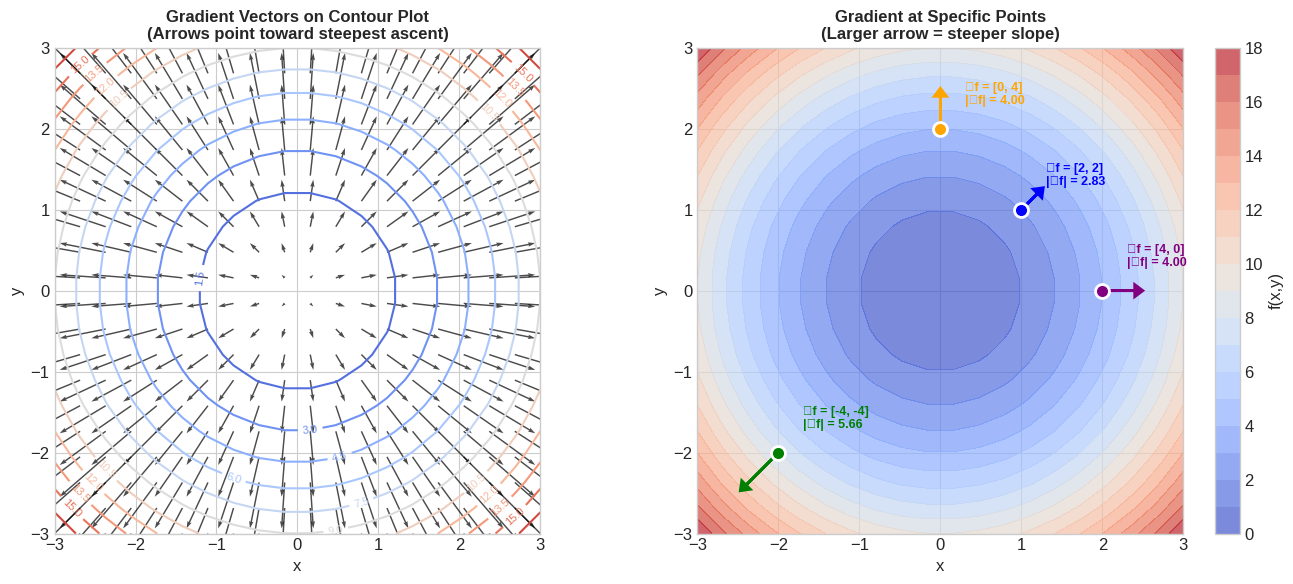


🔑 KEY OBSERVATIONS:
1. All gradients point AWAY from the minimum (0,0) - toward steepest ASCENT
2. Gradients are PERPENDICULAR to contour lines (level curves)
3. Larger magnitude = steeper slope = longer arrow
4. At the minimum (0,0), gradient would be [0, 0] - no direction to go!


In [4]:
# 🎯 Visualizing the Gradient as Arrows on a Contour Plot
# This is one of the most important visualizations to understand!

def f_bowl(x, y):
    """Bowl-shaped function: f(x,y) = x² + y²"""
    return x**2 + y**2

def gradient_bowl(x, y):
    """Gradient: ∇f = [2x, 2y]"""
    return 2*x, 2*y

# Create mesh
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = f_bowl(X, Y)

# Calculate gradients at each point
U, V = gradient_bowl(X, Y)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Contour plot with gradient arrows
ax1 = axes[0]
contours = ax1.contour(X, Y, Z, levels=15, cmap='coolwarm')
ax1.clabel(contours, inline=True, fontsize=8)
ax1.quiver(X, Y, U, V, color='black', alpha=0.7, scale=50)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Gradient Vectors on Contour Plot\n(Arrows point toward steepest ascent)', 
              fontsize=12, fontweight='bold')
ax1.set_aspect('equal')

# Plot 2: Show gradient at specific points with more detail
ax2 = axes[1]
contours2 = ax2.contourf(X, Y, Z, levels=20, cmap='coolwarm', alpha=0.7)
plt.colorbar(contours2, ax=ax2, label='f(x,y)')

# Mark specific points and their gradients
test_points = [(-2, -2), (1, 1), (2, 0), (0, 2)]
colors = ['green', 'blue', 'purple', 'orange']

for (px, py), color in zip(test_points, colors):
    gx, gy = gradient_bowl(px, py)
    magnitude = np.sqrt(gx**2 + gy**2)
    
    ax2.scatter([px], [py], color=color, s=100, zorder=5, edgecolors='white', linewidths=2)
    ax2.arrow(px, py, gx/10, gy/10, head_width=0.15, head_length=0.1, 
              fc=color, ec=color, linewidth=2)
    ax2.annotate(f'∇f = [{gx:.0f}, {gy:.0f}]\n|∇f| = {magnitude:.2f}', 
                 (px + 0.3, py + 0.3), fontsize=9, color=color, fontweight='bold')

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Gradient at Specific Points\n(Larger arrow = steeper slope)', 
              fontsize=12, fontweight='bold')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\n🔑 KEY OBSERVATIONS:")
print("1. All gradients point AWAY from the minimum (0,0) - toward steepest ASCENT")
print("2. Gradients are PERPENDICULAR to contour lines (level curves)")
print("3. Larger magnitude = steeper slope = longer arrow")
print("4. At the minimum (0,0), gradient would be [0, 0] - no direction to go!")

---

# Part 3: Gradient Descent - The Optimization Algorithm 🚀

## The Big Idea

If the gradient points to the **steepest ascent**, then the **negative gradient** points to the **steepest descent**!

This is the foundation of **Gradient Descent**, the algorithm that powers most of machine learning.

### The Algorithm:

$$x_{new} = x_{old} - \alpha \cdot \nabla f(x_{old})$$

Where:
- $x_{old}$ is our current position
- $\alpha$ (alpha) is the **learning rate** (step size)
- $\nabla f$ is the gradient
- $x_{new}$ is our new position

### Why Minus Sign?
- Gradient points to steepest **increase**
- We want to **minimize** (go downhill)
- So we go in the **opposite** direction (negative gradient)

---


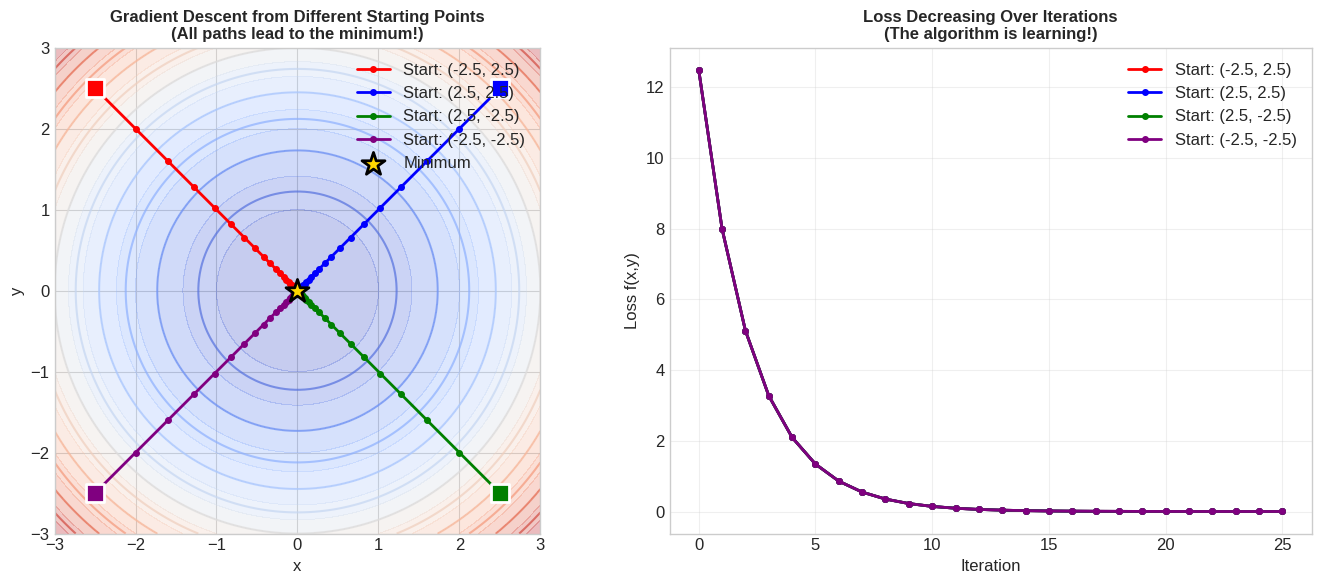


🔑 KEY INSIGHTS:
1. No matter where we start, gradient descent finds the minimum
2. The loss decreases with each iteration
3. Steps get smaller as we approach the minimum (gradient → 0)
4. This is exactly how neural networks learn!


In [5]:
# 🚀 Animated Gradient Descent Visualization
# Watch the algorithm find the minimum step by step!

def gradient_descent_2d(start, gradient_func, learning_rate=0.1, n_iterations=20):
    """
    Perform gradient descent and record the path.
    """
    path = [start]
    current = np.array(start, dtype=float)
    
    for _ in range(n_iterations):
        grad = np.array(gradient_func(current[0], current[1]))
        current = current - learning_rate * grad
        path.append(current.copy())
    
    return np.array(path)

# Our bowl function and its gradient
def f_bowl(x, y):
    return x**2 + y**2

def grad_bowl(x, y):
    return np.array([2*x, 2*y])

# Run gradient descent from different starting points
starting_points = [(-2.5, 2.5), (2.5, 2.5), (2.5, -2.5), (-2.5, -2.5)]
colors = ['red', 'blue', 'green', 'purple']
learning_rates = [0.1, 0.1, 0.1, 0.1]

# Create mesh for contour
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f_bowl(X, Y)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Gradient descent paths
ax1 = axes[0]
contours = ax1.contour(X, Y, Z, levels=15, cmap='coolwarm', alpha=0.7)
ax1.contourf(X, Y, Z, levels=20, cmap='coolwarm', alpha=0.3)

for start, color, lr in zip(starting_points, colors, learning_rates):
    path = gradient_descent_2d(start, grad_bowl, learning_rate=lr, n_iterations=25)
    ax1.plot(path[:, 0], path[:, 1], 'o-', color=color, markersize=4, 
             linewidth=2, label=f'Start: {start}')
    ax1.scatter([start[0]], [start[1]], color=color, s=150, marker='s', 
                edgecolors='white', linewidths=2, zorder=5)

ax1.scatter([0], [0], color='gold', s=300, marker='*', 
            edgecolors='black', linewidths=2, zorder=6, label='Minimum')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Gradient Descent from Different Starting Points\n(All paths lead to the minimum!)', 
              fontsize=12, fontweight='bold')
ax1.legend(loc='upper right')
ax1.set_aspect('equal')

# Plot 2: Loss over iterations
ax2 = axes[1]
for start, color in zip(starting_points, colors):
    path = gradient_descent_2d(start, grad_bowl, learning_rate=0.1, n_iterations=25)
    losses = [f_bowl(p[0], p[1]) for p in path]
    ax2.plot(losses, 'o-', color=color, markersize=4, linewidth=2, 
             label=f'Start: {start}')

ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Loss f(x,y)', fontsize=12)
ax2.set_title('Loss Decreasing Over Iterations\n(The algorithm is learning!)', 
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔑 KEY INSIGHTS:")
print("1. No matter where we start, gradient descent finds the minimum")
print("2. The loss decreases with each iteration")
print("3. Steps get smaller as we approach the minimum (gradient → 0)")
print("4. This is exactly how neural networks learn!")

---

## The Learning Rate: The Most Important Hyperparameter ⚙️

The learning rate $\alpha$ controls **how big our steps are**:

| Learning Rate | Effect |
|--------------|--------|
| Too small | Very slow convergence, may never reach minimum |
| Just right | Smooth, efficient convergence |
| Too large | Oscillation, overshooting, may diverge! |

### The Goldilocks Problem 🐻

Finding the right learning rate is like Goldilocks finding the perfect porridge:
- **Too hot** (large LR): Burns! (overshoots the minimum)
- **Too cold** (small LR): Takes forever to eat (converges too slowly)
- **Just right**: Perfect! (efficient convergence)

---


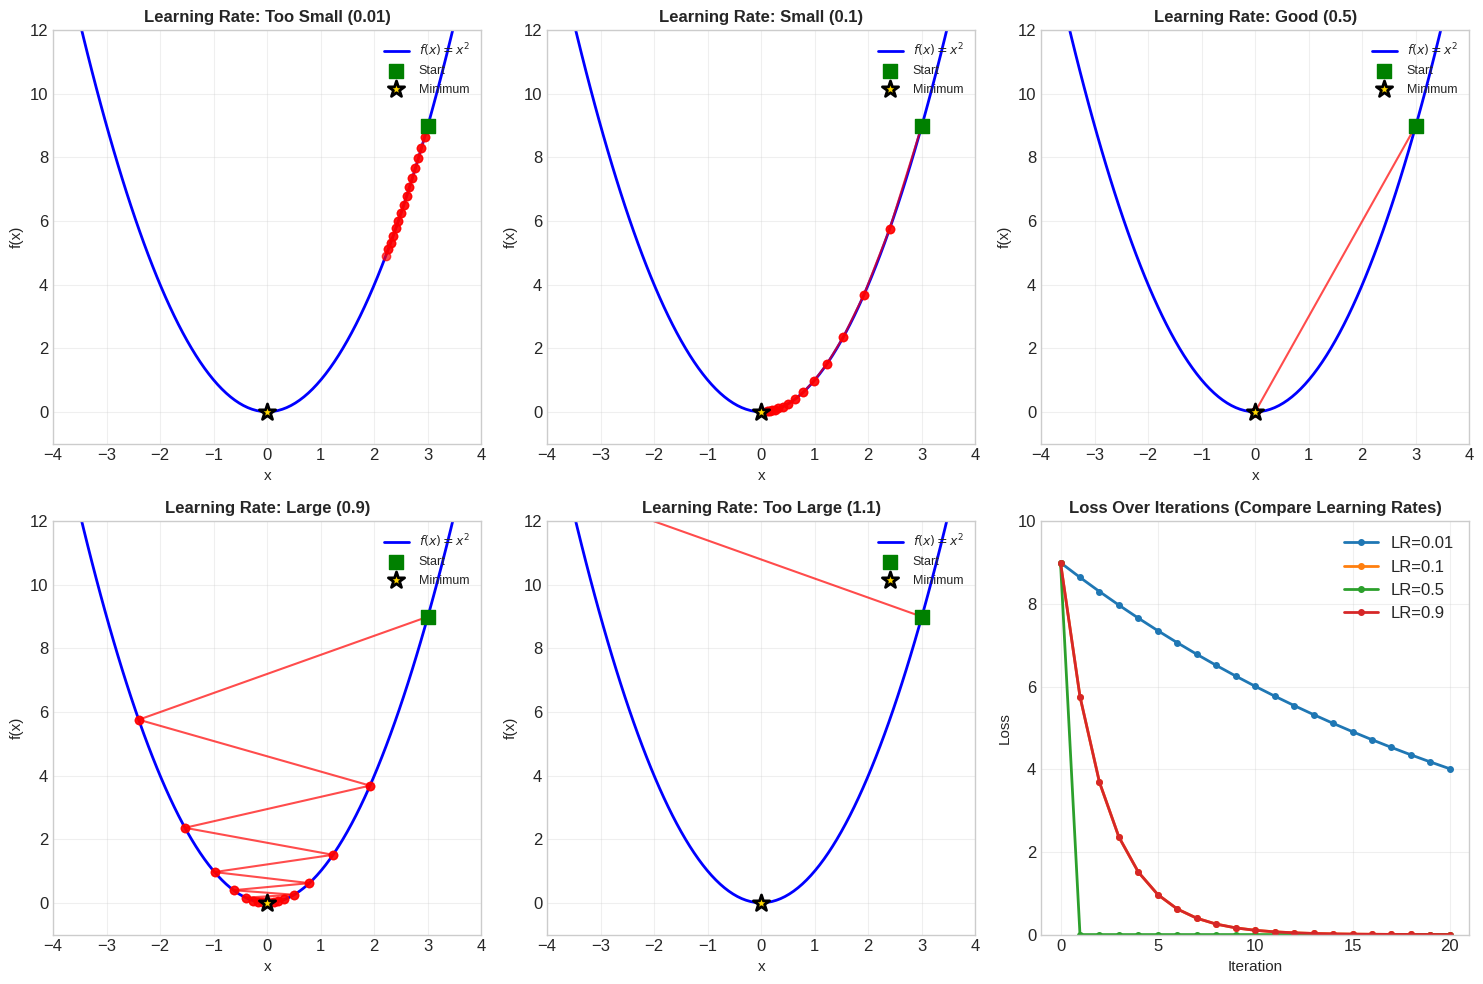


🔑 OBSERVATIONS:
• LR = 0.01: Too slow! Barely moves toward minimum
• LR = 0.1: Slow but steady progress
• LR = 0.5: Perfect! Fast and stable convergence
• LR = 0.9: Oscillates but still converges
• LR = 1.1: DIVERGES! Overshoots and gets worse each step


In [6]:
# ⚙️ The Effect of Learning Rate - Visual Demonstration

def f_1d(x):
    """Simple 1D function: f(x) = x²"""
    return x**2

def grad_1d(x):
    """Gradient: f'(x) = 2x"""
    return 2*x

def gradient_descent_1d(start, learning_rate, n_iterations=20):
    """1D gradient descent"""
    path = [start]
    x = start
    for _ in range(n_iterations):
        x = x - learning_rate * grad_1d(x)
        path.append(x)
    return np.array(path)

# Different learning rates to compare
learning_rates = [0.01, 0.1, 0.5, 0.9, 1.1]
titles = ['Too Small (0.01)', 'Small (0.1)', 'Good (0.5)', 'Large (0.9)', 'Too Large (1.1)']
start = 3.0

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

x_range = np.linspace(-4, 4, 100)

for i, (lr, title) in enumerate(zip(learning_rates, titles)):
    if i < 5:
        ax = axes[i]
        
        # Plot the function
        ax.plot(x_range, f_1d(x_range), 'b-', linewidth=2, label='$f(x) = x^2$')
        
        # Run gradient descent
        path = gradient_descent_1d(start, lr, n_iterations=15)
        
        # Plot the path
        for j in range(len(path) - 1):
            ax.plot([path[j], path[j+1]], [f_1d(path[j]), f_1d(path[j+1])], 
                   'ro-', markersize=6, linewidth=1.5, alpha=0.7)
        
        ax.scatter([start], [f_1d(start)], color='green', s=100, zorder=5, 
                   marker='s', label='Start')
        ax.scatter([0], [0], color='gold', s=150, marker='*', 
                   edgecolors='black', linewidths=2, zorder=5, label='Minimum')
        
        ax.set_xlabel('x', fontsize=11)
        ax.set_ylabel('f(x)', fontsize=11)
        ax.set_title(f'Learning Rate: {title}', fontsize=12, fontweight='bold')
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1, 12)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)

# Loss curves comparison
ax6 = axes[5]
for lr, title in zip(learning_rates[:4], titles[:4]):
    path = gradient_descent_1d(start, lr, n_iterations=20)
    losses = [f_1d(x) for x in path]
    ax6.plot(losses, 'o-', markersize=4, linewidth=2, label=f'LR={lr}')

ax6.set_xlabel('Iteration', fontsize=11)
ax6.set_ylabel('Loss', fontsize=11)
ax6.set_title('Loss Over Iterations (Compare Learning Rates)', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0, 10)

plt.tight_layout()
plt.show()

print("\n🔑 OBSERVATIONS:")
print("• LR = 0.01: Too slow! Barely moves toward minimum")
print("• LR = 0.1: Slow but steady progress")
print("• LR = 0.5: Perfect! Fast and stable convergence")
print("• LR = 0.9: Oscillates but still converges")
print("• LR = 1.1: DIVERGES! Overshoots and gets worse each step")

---
# Part 4: Computing Gradients - Methods & Techniques 🔧

## Three Ways to Compute Gradients:

### 1. **Analytical Gradients** (Pen and Paper)
- Derive the mathematical formula using calculus rules
- Exact and fast to compute
- Requires knowing calculus!

### 2. **Numerical Gradients** (Approximation)
- Estimate using the definition of derivative
- $$\frac{\partial f}{\partial x} \approx \frac{f(x + h) - f(x - h)}{2h}$$
- Slower but works for any function
- Good for checking your analytical gradients!

### 3. **Automatic Differentiation** (The Modern Way)
- Computer automatically computes exact gradients
- Used in PyTorch, TensorFlow, JAX
- Best of both worlds: exact AND automatic!
---


In [7]:
# 🔧 Comparing Different Methods of Computing Gradients

# Method 1: Analytical Gradient (we derived this by hand)
def analytical_gradient(x, y):
    """For f(x,y) = x² + y², gradient is [2x, 2y]"""
    return np.array([2*x, 2*y])

# Method 2: Numerical Gradient (approximation using finite differences)
def numerical_gradient(f, x, y, h=1e-5):
    """
    Compute gradient using central difference approximation.
    This is the definition of derivative!
    """
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

def f(x, y):
    return x**2 + y**2

# Test at several points
test_points = [(1, 2), (3, 4), (-2, 5), (0.5, 1.5)]

print("=" * 70)
print("COMPARING GRADIENT COMPUTATION METHODS")
print("=" * 70)
print(f"{'Point':<15} {'Analytical':<25} {'Numerical':<25} {'Error':<10}")
print("-" * 70)

for point in test_points:
    x, y = point
    analytical = analytical_gradient(x, y)
    numerical = numerical_gradient(f, x, y)
    error = np.linalg.norm(analytical - numerical)
    
    print(f"({x}, {y}){'':<8} [{analytical[0]:.4f}, {analytical[1]:.4f}]{'':<8} "
          f"[{numerical[0]:.4f}, {numerical[1]:.4f}]{'':<8} {error:.2e}")

print("-" * 70)
print("\n✅ Both methods give essentially the same result!")
print("📝 Numerical gradients are useful for:")
print("   - Verifying your analytical gradients (gradient checking)")
print("   - Functions where analytical derivatives are hard to derive")

COMPARING GRADIENT COMPUTATION METHODS
Point           Analytical                Numerical                 Error     
----------------------------------------------------------------------
(1, 2)         [2.0000, 4.0000]         [2.0000, 4.0000]         2.93e-11
(3, 4)         [6.0000, 8.0000]         [6.0000, 8.0000]         1.79e-10
(-2, 5)         [-4.0000, 10.0000]         [-4.0000, 10.0000]         3.79e-10
(0.5, 1.5)         [1.0000, 3.0000]         [1.0000, 3.0000]         2.07e-11
----------------------------------------------------------------------

✅ Both methods give essentially the same result!
📝 Numerical gradients are useful for:
   - Verifying your analytical gradients (gradient checking)
   - Functions where analytical derivatives are hard to derive


---

# Part 5: The Chain Rule - The Heart of Backpropagation 🔗

## Why is the Chain Rule So Important?

Neural networks are **compositions of functions**:
$$y = f_3(f_2(f_1(x)))$$

To train them, we need gradients through ALL layers!

### The Chain Rule:
For $y = f(g(x))$:

$$\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}$$

### In Plain English:
> "The rate of change of y with respect to x equals the rate of change of y with respect to g, TIMES the rate of change of g with respect to x"

### Visual Analogy 🔗

Think of a chain of gears:
- If gear A turns gear B, and gear B turns gear C
- The effect of A on C = (effect of A on B) × (effect of B on C)

---


In [8]:
# 🔗 The Chain Rule in Action - A Complete Example

print("=" * 70)
print("THE CHAIN RULE - STEP BY STEP EXAMPLE")
print("=" * 70)

# Let's compute the gradient of a composite function
# y = (3x + 2)²

# Breaking it down:
# Let u = 3x + 2  (inner function)
# Let y = u²     (outer function)

# Using chain rule: dy/dx = dy/du × du/dx

x = 2  # Our input

# Forward pass (compute y)
u = 3 * x + 2  # u = 3(2) + 2 = 8
y = u ** 2      # y = 8² = 64

print(f"\n📊 FORWARD PASS:")
print(f"   x = {x}")
print(f"   u = 3x + 2 = 3({x}) + 2 = {u}")
print(f"   y = u² = {u}² = {y}")

# Backward pass (compute gradients using chain rule)
dy_du = 2 * u   # d(u²)/du = 2u = 2(8) = 16
du_dx = 3       # d(3x+2)/dx = 3

# Chain rule!
dy_dx = dy_du * du_dx  # dy/dx = dy/du × du/dx

print(f"\n📊 BACKWARD PASS (Chain Rule):")
print(f"   dy/du = 2u = 2({u}) = {dy_du}")
print(f"   du/dx = 3")
print(f"   dy/dx = dy/du × du/dx = {dy_du} × {du_dx} = {dy_dx}")

# Verify with the analytical formula
# y = (3x + 2)² 
# dy/dx = 2(3x + 2) × 3 = 6(3x + 2)
direct_dy_dx = 6 * (3 * x + 2)

print(f"\n✅ VERIFICATION:")
print(f"   Direct formula: dy/dx = 6(3x + 2) = 6({3*x + 2}) = {direct_dy_dx}")
print(f"   Chain rule result: {dy_dx}")
print(f"   Match: {dy_dx == direct_dy_dx} ✓")

# Visual representation
print("\n" + "=" * 70)
print("VISUAL REPRESENTATION OF CHAIN RULE:")
print("=" * 70)
print("""
    x ──────► u = 3x + 2 ──────► y = u²
    
    Forward:  2 ─────────► 8 ────────────► 64
    
    Backward: ◄───────── ×3 ◄────────── ×16
              dy/dx = 48    dy/du = 16
              
    Chain: dy/dx = dy/du × du/dx = 16 × 3 = 48
""")

THE CHAIN RULE - STEP BY STEP EXAMPLE

📊 FORWARD PASS:
   x = 2
   u = 3x + 2 = 3(2) + 2 = 8
   y = u² = 8² = 64

📊 BACKWARD PASS (Chain Rule):
   dy/du = 2u = 2(8) = 16
   du/dx = 3
   dy/dx = dy/du × du/dx = 16 × 3 = 48

✅ VERIFICATION:
   Direct formula: dy/dx = 6(3x + 2) = 6(8) = 48
   Chain rule result: 48
   Match: True ✓

VISUAL REPRESENTATION OF CHAIN RULE:

    x ──────► u = 3x + 2 ──────► y = u²

    Forward:  2 ─────────► 8 ────────────► 64

    Backward: ◄───────── ×3 ◄────────── ×16
              dy/dx = 48    dy/du = 16

    Chain: dy/dx = dy/du × du/dx = 16 × 3 = 48



---

# Part 6: Gradients in Machine Learning 🤖

## Linear Regression: A Complete Gradient Example

Let's see gradients in action with a **real machine learning problem**!

### The Setup:
- Data: $(x_i, y_i)$ pairs
- Model: $\hat{y} = wx + b$ (predict y from x)
- Goal: Find $w$ and $b$ that minimize the error

### The Loss Function (Mean Squared Error):
$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2$$

### The Gradients:
$$\frac{\partial L}{\partial w} = \frac{-2}{n}\sum_{i=1}^{n}x_i(y_i - (wx_i + b))$$

$$\frac{\partial L}{\partial b} = \frac{-2}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))$$

---


In [9]:
# 🤖 Linear Regression from Scratch with Gradient Descent

# Generate synthetic data
np.random.seed(42)
n_samples = 100
X = 2 * np.random.rand(n_samples)
y_true = 4 + 3 * X  # True line: y = 4 + 3x
y = y_true + np.random.randn(n_samples) * 0.5  # Add noise

# Initialize parameters randomly
w = np.random.randn()
b = np.random.randn()

# Hyperparameters
learning_rate = 0.1
n_iterations = 100

# Store history for visualization
history = {'w': [w], 'b': [b], 'loss': []}

def compute_loss(X, y, w, b):
    """Mean Squared Error"""
    predictions = w * X + b
    return np.mean((y - predictions) ** 2)

def compute_gradients(X, y, w, b):
    """Compute gradients of MSE w.r.t. w and b"""
    n = len(X)
    predictions = w * X + b
    errors = y - predictions
    
    dw = -2/n * np.sum(X * errors)
    db = -2/n * np.sum(errors)
    
    return dw, db

# Training loop
print("=" * 70)
print("TRAINING LINEAR REGRESSION WITH GRADIENT DESCENT")
print("=" * 70)
print(f"True parameters: w = 3, b = 4")
print(f"Initial guess: w = {w:.4f}, b = {b:.4f}")
print("-" * 70)

for i in range(n_iterations):
    # Compute loss
    loss = compute_loss(X, y, w, b)
    history['loss'].append(loss)
    
    # Compute gradients
    dw, db = compute_gradients(X, y, w, b)
    
    # Update parameters (gradient descent step!)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    # Store history
    history['w'].append(w)
    history['b'].append(b)
    
    # Print progress
    if i % 20 == 0 or i == n_iterations - 1:
        print(f"Iteration {i:3d}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

print("-" * 70)
print(f"✅ Final parameters: w = {w:.4f} (true: 3), b = {b:.4f} (true: 4)")
print(f"   Error in w: {abs(w - 3):.4f}")
print(f"   Error in b: {abs(b - 4):.4f}")

TRAINING LINEAR REGRESSION WITH GRADIENT DESCENT
True parameters: w = 3, b = 4
Initial guess: w = 0.0130, b = 1.4535
----------------------------------------------------------------------
Iteration   0: Loss = 31.7662, w = 1.2214, b = 2.5245
Iteration  20: Loss = 0.2020, w = 2.9134, b = 4.0754
Iteration  40: Loss = 0.2017, w = 2.8993, b = 4.0914
Iteration  60: Loss = 0.2017, w = 2.8922, b = 4.0995
Iteration  80: Loss = 0.2017, w = 2.8886, b = 4.1035
Iteration  99: Loss = 0.2016, w = 2.8869, b = 4.1054
----------------------------------------------------------------------
✅ Final parameters: w = 2.8869 (true: 3), b = 4.1054 (true: 4)
   Error in w: 0.1131
   Error in b: 0.1054


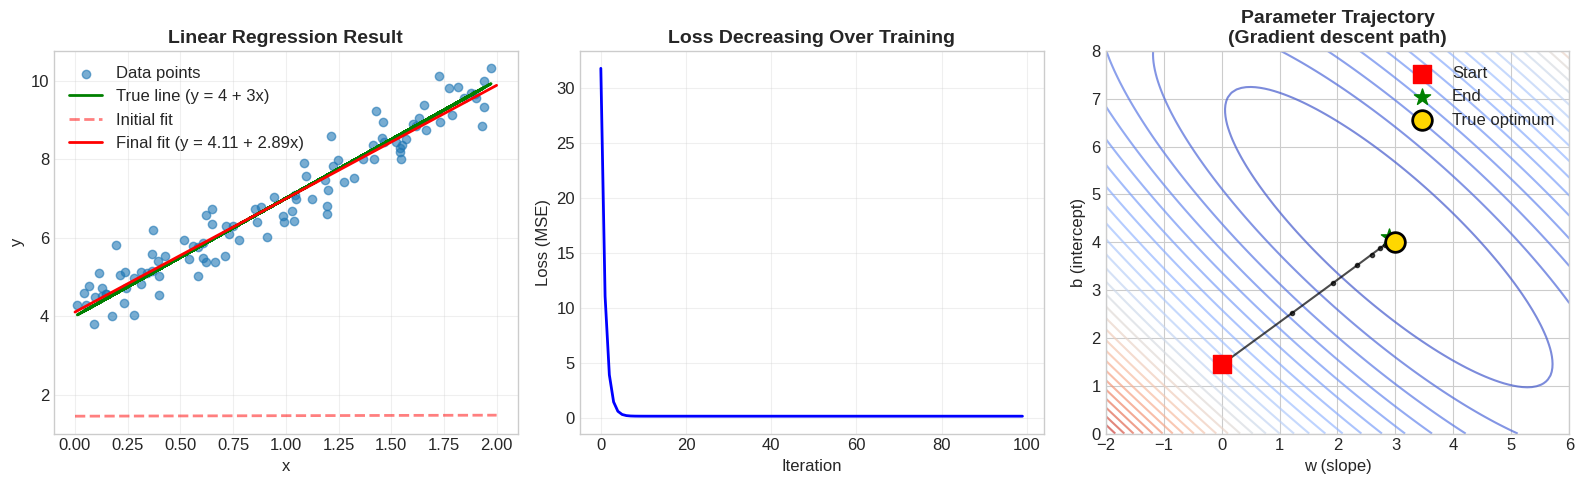


🔑 KEY INSIGHTS:
1. Gradient descent found parameters very close to the true values!
2. Loss decreased rapidly at first, then slowed down (typical behavior)
3. The path in parameter space follows the negative gradient direction


In [11]:
# 📊 Visualize the Training Process

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Data and fitted line
ax1 = axes[0]
ax1.scatter(X, y, alpha=0.6, label='Data points')
ax1.plot(X, y_true, 'g-', linewidth=2, label='True line (y = 4 + 3x)')

# Plot initial, middle, and final fits
x_line = np.array([0, 2])
ax1.plot(x_line, history['w'][0] * x_line + history['b'][0], 'r--', 
         linewidth=2, alpha=0.5, label='Initial fit')
ax1.plot(x_line, w * x_line + b, 'r-', 
         linewidth=2, label=f'Final fit (y = {b:.2f} + {w:.2f}x)')

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Linear Regression Result', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Loss over iterations
ax2 = axes[1]
ax2.plot(history['loss'], 'b-', linewidth=2)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Loss (MSE)', fontsize=12)
ax2.set_title('Loss Decreasing Over Training', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Parameter trajectory in w-b space
ax3 = axes[2]

# Create loss surface
w_range = np.linspace(-2, 6, 100)
b_range = np.linspace(0, 8, 100)
W, B = np.meshgrid(w_range, b_range)
Z = np.array([[compute_loss(X, y, w_, b_) for w_ in w_range] for b_ in b_range])

contours = ax3.contour(W, B, Z, levels=30, cmap='coolwarm', alpha=0.7)
ax3.plot(history['w'], history['b'], 'ko-', markersize=3, linewidth=1.5, alpha=0.7)
ax3.scatter([history['w'][0]], [history['b'][0]], color='red', s=150, 
            marker='s', zorder=5, label='Start')
ax3.scatter([w], [b], color='green', s=150, marker='*', zorder=5, label='End')
ax3.scatter([3], [4], color='gold', s=200, marker='o', zorder=5, 
            edgecolors='black', linewidths=2, label='True optimum')

ax3.set_xlabel('w (slope)', fontsize=12)
ax3.set_ylabel('b (intercept)', fontsize=12)
ax3.set_title('Parameter Trajectory\n(Gradient descent path)', fontsize=14, fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.show()

print("\n🔑 KEY INSIGHTS:")
print("1. Gradient descent found parameters very close to the true values!")
print("2. Loss decreased rapidly at first, then slowed down (typical behavior)")
print("3. The path in parameter space follows the negative gradient direction")

---

# Part 7: Neural Networks - Gradients at Scale 🧠

## From Linear Regression to Neural Networks

A neural network is just **many linear regressions stacked together** with **non-linear activations** in between!

### Single Neuron:
$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
$$a = \sigma(z)$$

Where $\sigma$ is an activation function (ReLU, Sigmoid, etc.)

### The Power of Depth:
By stacking layers and using the **chain rule**, gradients flow backward through the entire network - this is **backpropagation**!

---


In [12]:
# 🧠 Building a Simple Neural Network from Scratch

class SimpleNeuralNetwork:
    """
    A 2-layer neural network built from scratch to understand gradients!
    Architecture: Input → Hidden (with ReLU) → Output
    """
    
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        np.random.seed(42)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        
        # Store for backward pass
        self.cache = {}
        
    def relu(self, z):
        """ReLU activation: max(0, z)"""
        return np.maximum(0, z)
    
    def relu_derivative(self, z):
        """Derivative of ReLU"""
        return (z > 0).astype(float)
    
    def forward(self, X):
        """
        Forward pass: compute output given input.
        Store intermediate values for backward pass.
        """
        # Layer 1
        self.cache['Z1'] = X @ self.W1 + self.b1
        self.cache['A1'] = self.relu(self.cache['Z1'])
        
        # Layer 2 (output)
        self.cache['Z2'] = self.cache['A1'] @ self.W2 + self.b2
        self.cache['A2'] = self.cache['Z2']  # Linear output for regression
        
        return self.cache['A2']
    
    def backward(self, X, y, output):
        """
        Backward pass: compute gradients using chain rule!
        This is where the magic happens!
        """
        m = X.shape[0]
        
        # Gradient of loss w.r.t. output (MSE loss)
        dA2 = (2/m) * (output - y)
        
        # Gradient for Layer 2 (chain rule!)
        dW2 = self.cache['A1'].T @ dA2
        db2 = np.sum(dA2, axis=0, keepdims=True)
        
        # Backpropagate through Layer 1 (chain rule continues!)
        dA1 = dA2 @ self.W2.T
        dZ1 = dA1 * self.relu_derivative(self.cache['Z1'])
        dW1 = X.T @ dZ1
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        
        return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    def update(self, gradients, learning_rate):
        """Update weights using gradient descent"""
        self.W1 -= learning_rate * gradients['dW1']
        self.b1 -= learning_rate * gradients['db1']
        self.W2 -= learning_rate * gradients['dW2']
        self.b2 -= learning_rate * gradients['db2']
    
    def train(self, X, y, learning_rate=0.01, n_iterations=1000):
        """Train the network!"""
        losses = []
        
        for i in range(n_iterations):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass (compute gradients)
            gradients = self.backward(X, y, output)
            
            # Update weights
            self.update(gradients, learning_rate)
            
        return losses

# Create a non-linear dataset (XOR-like problem)
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(float).reshape(-1, 1)  # XOR-like

# Create and train the network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=8, output_size=1)
losses = nn.train(X, y, learning_rate=0.1, n_iterations=500)

print("=" * 70)
print("NEURAL NETWORK TRAINING COMPLETE!")
print("=" * 70)
print(f"Initial Loss: {losses[0]:.4f}")
print(f"Final Loss: {losses[-1]:.4f}")
print(f"Improvement: {((losses[0] - losses[-1])/losses[0] * 100):.1f}%")

NEURAL NETWORK TRAINING COMPLETE!
Initial Loss: 1.5301
Final Loss: 0.0892
Improvement: 94.2%


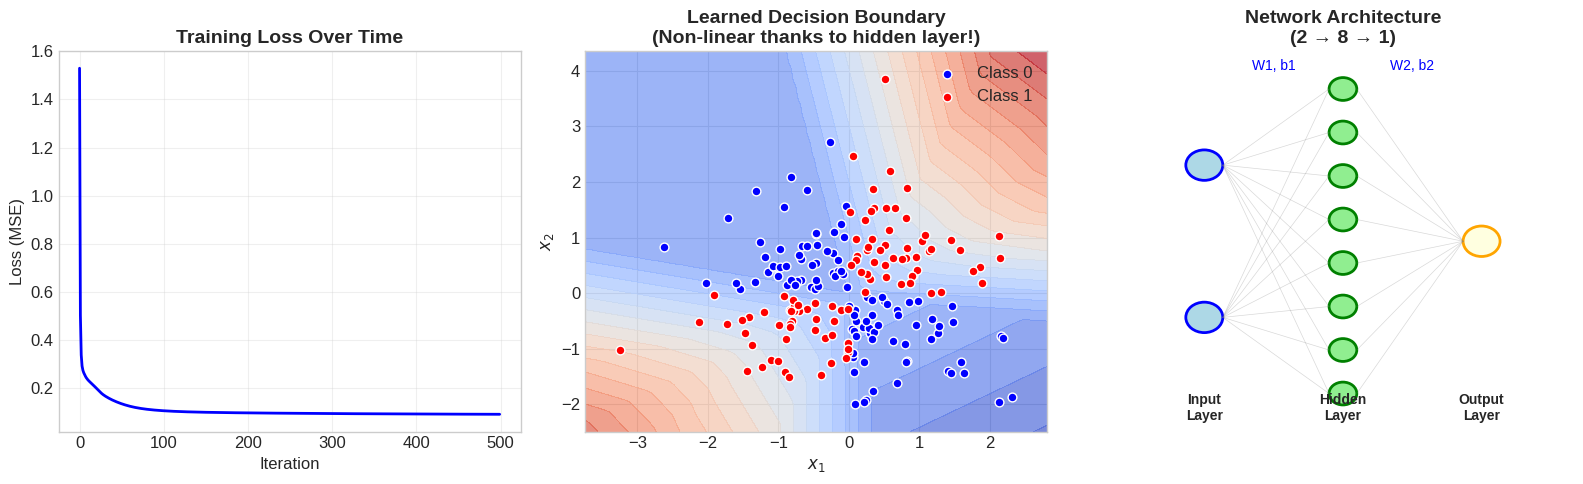


🔑 KEY INSIGHTS:
1. The neural network learned a NON-LINEAR decision boundary
2. This is impossible with simple linear regression!
3. Gradients flowed backward through both layers (backpropagation)
4. The hidden layer allows the network to learn complex patterns


In [13]:
# 📊 Visualize the Neural Network Results

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Training loss
ax1 = axes[0]
ax1.plot(losses, 'b-', linewidth=2)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Loss (MSE)', fontsize=12)
ax1.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Decision boundary
ax2 = axes[1]
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax2.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.7)
ax2.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], 
            c='blue', s=40, label='Class 0', edgecolors='white')
ax2.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], 
            c='red', s=40, label='Class 1', edgecolors='white')
ax2.set_xlabel('$x_1$', fontsize=12)
ax2.set_ylabel('$x_2$', fontsize=12)
ax2.set_title('Learned Decision Boundary\n(Non-linear thanks to hidden layer!)', 
              fontsize=14, fontweight='bold')
ax2.legend()

# Plot 3: Network architecture visualization
ax3 = axes[2]
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)

# Draw neurons
input_y = [3, 7]
hidden_y = np.linspace(1, 9, 8)
output_y = [5]

# Input layer
for y_pos in input_y:
    circle = plt.Circle((2, y_pos), 0.4, color='lightblue', ec='blue', linewidth=2)
    ax3.add_patch(circle)

# Hidden layer
for y_pos in hidden_y:
    circle = plt.Circle((5, y_pos), 0.3, color='lightgreen', ec='green', linewidth=2)
    ax3.add_patch(circle)

# Output layer
circle = plt.Circle((8, 5), 0.4, color='lightyellow', ec='orange', linewidth=2)
ax3.add_patch(circle)

# Draw connections (simplified)
for iy in input_y:
    for hy in hidden_y:
        ax3.plot([2.4, 4.7], [iy, hy], 'gray', alpha=0.3, linewidth=0.5)

for hy in hidden_y:
    ax3.plot([5.3, 7.6], [hy, 5], 'gray', alpha=0.3, linewidth=0.5)

# Labels
ax3.text(2, 0.3, 'Input\nLayer', ha='center', fontsize=10, fontweight='bold')
ax3.text(5, 0.3, 'Hidden\nLayer', ha='center', fontsize=10, fontweight='bold')
ax3.text(8, 0.3, 'Output\nLayer', ha='center', fontsize=10, fontweight='bold')
ax3.text(3.5, 9.5, 'W1, b1', ha='center', fontsize=10, color='blue')
ax3.text(6.5, 9.5, 'W2, b2', ha='center', fontsize=10, color='blue')

ax3.set_title('Network Architecture\n(2 → 8 → 1)', fontsize=14, fontweight='bold')
ax3.axis('off')

plt.tight_layout()
plt.show()

print("\n🔑 KEY INSIGHTS:")
print("1. The neural network learned a NON-LINEAR decision boundary")
print("2. This is impossible with simple linear regression!")
print("3. Gradients flowed backward through both layers (backpropagation)")
print("4. The hidden layer allows the network to learn complex patterns")

---

# Part 8: Advanced Topics 🎓

## Common Gradient Problems in Deep Learning

### 1. **Vanishing Gradients** 📉
When gradients become very small as they backpropagate through many layers.
- **Cause**: Sigmoid/tanh activations squash gradients
- **Solution**: Use ReLU, residual connections, batch normalization

### 2. **Exploding Gradients** 📈
When gradients become very large, causing unstable training.
- **Cause**: Large weights, deep networks
- **Solution**: Gradient clipping, careful initialization

### 3. **Saddle Points** 🐴
Points where gradient is zero but it's not a minimum (like a horse saddle).
- **Solution**: Momentum-based optimizers (Adam, RMSprop)

---


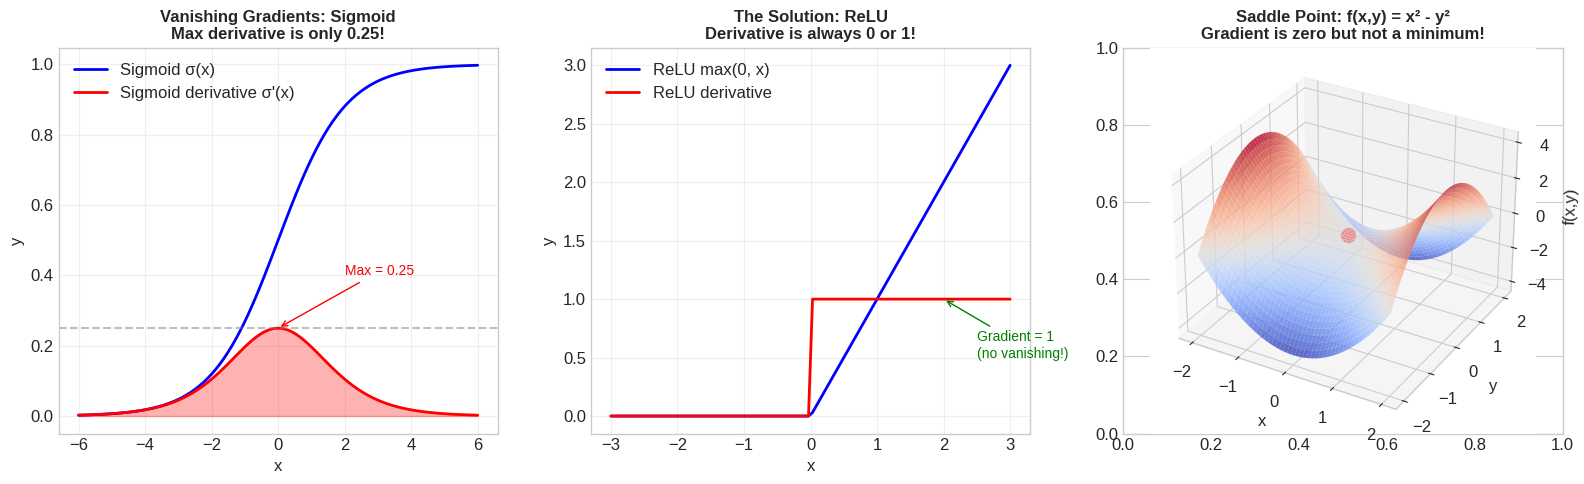


🔑 KEY TAKEAWAYS:
• Sigmoid: max derivative = 0.25 → after 4 layers: 0.25⁴ ≈ 0.004 (vanished!)
• ReLU: derivative is always 0 or 1 → gradients flow freely
• Saddle points: common in high dimensions, use momentum to escape!


In [14]:
# 🎓 Visualizing Gradient Problems

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Vanishing Gradients with Sigmoid
ax1 = axes[0]
x = np.linspace(-6, 6, 100)

# Sigmoid function
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

ax1.plot(x, sigmoid, 'b-', linewidth=2, label='Sigmoid σ(x)')
ax1.plot(x, sigmoid_derivative, 'r-', linewidth=2, label="Sigmoid derivative σ'(x)")
ax1.axhline(y=0.25, color='gray', linestyle='--', alpha=0.5)
ax1.fill_between(x, sigmoid_derivative, alpha=0.3, color='red')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Vanishing Gradients: Sigmoid\nMax derivative is only 0.25!', 
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.annotate('Max = 0.25', xy=(0, 0.25), xytext=(2, 0.4),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

# Plot 2: ReLU - The Solution
ax2 = axes[1]
x = np.linspace(-3, 3, 100)

relu = np.maximum(0, x)
relu_derivative = (x > 0).astype(float)

ax2.plot(x, relu, 'b-', linewidth=2, label='ReLU max(0, x)')
ax2.plot(x, relu_derivative, 'r-', linewidth=2, label="ReLU derivative")
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('The Solution: ReLU\nDerivative is always 0 or 1!', 
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.annotate('Gradient = 1\n(no vanishing!)', xy=(2, 1), xytext=(2.5, 0.5),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10, color='green')

# Plot 3: Saddle Point
ax3 = axes[2]
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2  # Saddle function

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
ax3.scatter([0], [0], [0], color='red', s=100, label='Saddle point')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('f(x,y)')
ax3.set_title('Saddle Point: f(x,y) = x² - y²\nGradient is zero but not a minimum!', 
              fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔑 KEY TAKEAWAYS:")
print("• Sigmoid: max derivative = 0.25 → after 4 layers: 0.25⁴ ≈ 0.004 (vanished!)")
print("• ReLU: derivative is always 0 or 1 → gradients flow freely")
print("• Saddle points: common in high dimensions, use momentum to escape!")

---

## Modern Optimizers: Beyond Vanilla Gradient Descent

### 1. **Stochastic Gradient Descent (SGD)**
Uses mini-batches instead of full dataset - faster but noisier.

### 2. **Momentum**
$$v_t = \beta v_{t-1} + \nabla f$$
$$\theta = \theta - \alpha v_t$$

Adds "momentum" like a rolling ball - helps escape local minima.

### 3. **Adam (Adaptive Moment Estimation)** ⭐
The most popular optimizer today!
- Adapts learning rate for each parameter
- Combines momentum and adaptive learning rates

---


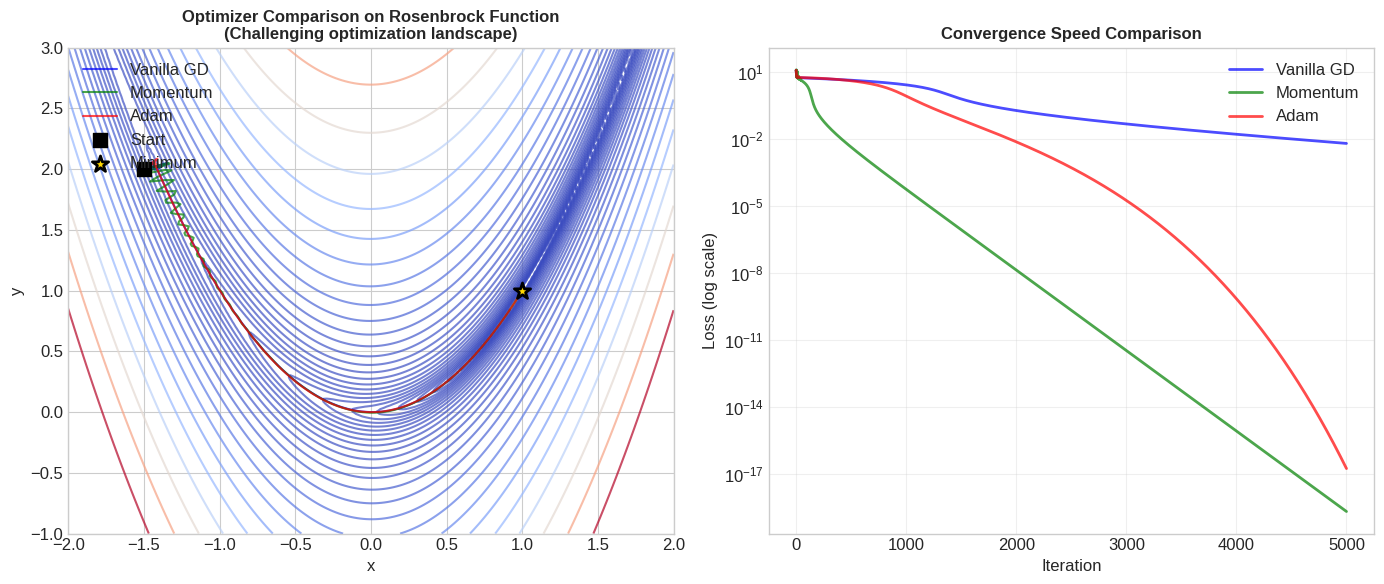


🔑 OPTIMIZER COMPARISON:
Vanilla GD final loss: 0.0065
Momentum final loss:   0.0000
Adam final loss:       0.000000

⭐ Adam clearly wins! It's the default choice in modern deep learning.


In [15]:
# 🏃 Comparing Optimizers - See the Difference!

def rosenbrock(x, y):
    """The famous Rosenbrock function - a challenging optimization landscape"""
    return (1 - x)**2 + 100*(y - x**2)**2

def rosenbrock_gradient(x, y):
    """Gradient of Rosenbrock function"""
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])

# Optimizers
def vanilla_gd(gradient_func, start, lr=0.001, n_iter=1000):
    """Vanilla Gradient Descent"""
    path = [np.array(start)]
    pos = np.array(start, dtype=float)
    for _ in range(n_iter):
        grad = gradient_func(pos[0], pos[1])
        pos = pos - lr * grad
        path.append(pos.copy())
    return np.array(path)

def momentum_gd(gradient_func, start, lr=0.001, beta=0.9, n_iter=1000):
    """Gradient Descent with Momentum"""
    path = [np.array(start)]
    pos = np.array(start, dtype=float)
    velocity = np.zeros(2)
    for _ in range(n_iter):
        grad = gradient_func(pos[0], pos[1])
        velocity = beta * velocity + grad
        pos = pos - lr * velocity
        path.append(pos.copy())
    return np.array(path)

def adam_optimizer(gradient_func, start, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8, n_iter=1000):
    """Adam Optimizer"""
    path = [np.array(start)]
    pos = np.array(start, dtype=float)
    m = np.zeros(2)
    v = np.zeros(2)
    for t in range(1, n_iter + 1):
        grad = gradient_func(pos[0], pos[1])
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        pos = pos - lr * m_hat / (np.sqrt(v_hat) + eps)
        path.append(pos.copy())
    return np.array(path)

# Starting point
start = (-1.5, 2.0)

# Run optimizers
path_vanilla = vanilla_gd(rosenbrock_gradient, start, lr=0.001, n_iter=5000)
path_momentum = momentum_gd(rosenbrock_gradient, start, lr=0.001, n_iter=5000)
path_adam = adam_optimizer(rosenbrock_gradient, start, lr=0.01, n_iter=5000)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create contour mesh
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Plot 1: Optimizer paths
ax1 = axes[0]
ax1.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap='coolwarm', alpha=0.7)
ax1.plot(path_vanilla[:, 0], path_vanilla[:, 1], 'b-', linewidth=1.5, 
         label='Vanilla GD', alpha=0.7)
ax1.plot(path_momentum[:, 0], path_momentum[:, 1], 'g-', linewidth=1.5, 
         label='Momentum', alpha=0.7)
ax1.plot(path_adam[:, 0], path_adam[:, 1], 'r-', linewidth=1.5, 
         label='Adam', alpha=0.7)
ax1.scatter([start[0]], [start[1]], color='black', s=100, marker='s', 
            zorder=5, label='Start')
ax1.scatter([1], [1], color='gold', s=150, marker='*', 
            edgecolors='black', linewidths=2, zorder=5, label='Minimum')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Optimizer Comparison on Rosenbrock Function\n(Challenging optimization landscape)', 
              fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 3)

# Plot 2: Loss over iterations
ax2 = axes[1]
losses_vanilla = [rosenbrock(p[0], p[1]) for p in path_vanilla]
losses_momentum = [rosenbrock(p[0], p[1]) for p in path_momentum]
losses_adam = [rosenbrock(p[0], p[1]) for p in path_adam]

ax2.semilogy(losses_vanilla, 'b-', linewidth=2, label='Vanilla GD', alpha=0.7)
ax2.semilogy(losses_momentum, 'g-', linewidth=2, label='Momentum', alpha=0.7)
ax2.semilogy(losses_adam, 'r-', linewidth=2, label='Adam', alpha=0.7)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Loss (log scale)', fontsize=12)
ax2.set_title('Convergence Speed Comparison', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔑 OPTIMIZER COMPARISON:")
print(f"Vanilla GD final loss: {losses_vanilla[-1]:.4f}")
print(f"Momentum final loss:   {losses_momentum[-1]:.4f}")
print(f"Adam final loss:       {losses_adam[-1]:.6f}")
print("\n⭐ Adam clearly wins! It's the default choice in modern deep learning.")

---

# Part 9: Quick Reference & Cheat Sheet 📋

## Essential Gradient Formulas

### Basic Derivatives:
| Function | Derivative |
|----------|------------|
| $x^n$ | $nx^{n-1}$ |
| $e^x$ | $e^x$ |
| $\ln(x)$ | $1/x$ |
| $\sin(x)$ | $\cos(x)$ |
| $\cos(x)$ | $-\sin(x)$ |

### Gradient Rules:
| Rule | Formula |
|------|---------|
| Sum Rule | $\nabla(f + g) = \nabla f + \nabla g$ |
| Product Rule | $\nabla(fg) = f\nabla g + g\nabla f$ |
| Chain Rule | $\nabla(f \circ g) = (\nabla f \circ g) \cdot \nabla g$ |

### Common Loss Functions:
| Loss | Formula | Gradient |
|------|---------|----------|
| MSE | $\frac{1}{n}\sum(y - \hat{y})^2$ | $\frac{-2}{n}\sum(y - \hat{y})$ |
| Cross-Entropy | $-\sum y\log(\hat{y})$ | $-\frac{y}{\hat{y}}$ |

---


🔍 INTERACTIVE GRADIENT VISUALIZATION
Function: f(x,y) = x² + 2y² (an elliptical paraboloid)


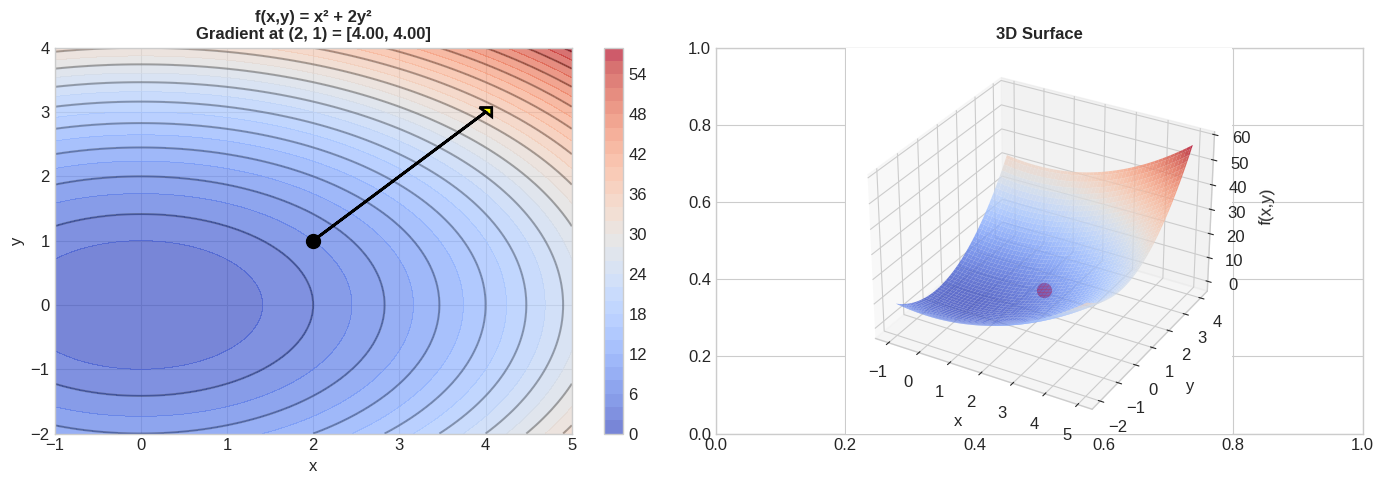


📊 GRADIENT ANALYSIS at (2, 1):
   ∂f/∂x = 4.0000
   ∂f/∂y = 4.0000
   Magnitude |∇f| = 5.6569
   Direction = 45.0° (from positive x-axis)
   This tells us: move in direction (-4.00, -4.00) to descend fastest!


In [16]:
# 📋 Interactive Gradient Calculator - Try It Yourself!

def visualize_gradient_at_point(func, grad_func, point, func_name="f(x,y)"):
    """
    Visualize a function and its gradient at a specific point.
    
    Parameters:
    - func: The function f(x, y)
    - grad_func: The gradient function returning [∂f/∂x, ∂f/∂y]
    - point: Tuple (x, y) where to evaluate gradient
    - func_name: Name for the title
    """
    x_range = np.linspace(point[0] - 3, point[0] + 3, 100)
    y_range = np.linspace(point[1] - 3, point[1] + 3, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)
    
    # Compute gradient at point
    grad = grad_func(point[0], point[1])
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Contour plot
    ax1 = axes[0]
    contours = ax1.contourf(X, Y, Z, levels=30, cmap='coolwarm', alpha=0.7)
    ax1.contour(X, Y, Z, levels=15, colors='black', alpha=0.3)
    plt.colorbar(contours, ax=ax1)
    
    # Plot point and gradient arrow
    ax1.scatter([point[0]], [point[1]], color='black', s=100, zorder=5)
    scale = 0.5  # Arrow scale
    ax1.arrow(point[0], point[1], grad[0]*scale, grad[1]*scale, 
              head_width=0.2, head_length=0.1, fc='yellow', ec='black', linewidth=2)
    
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.set_title(f'{func_name}\nGradient at ({point[0]}, {point[1]}) = [{grad[0]:.2f}, {grad[1]:.2f}]', 
                  fontsize=12, fontweight='bold')
    
    # 3D surface
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
    ax2.scatter([point[0]], [point[1]], [func(point[0], point[1])], 
                color='red', s=100, zorder=5)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('f(x,y)')
    ax2.set_title('3D Surface', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print information
    magnitude = np.sqrt(grad[0]**2 + grad[1]**2)
    direction = np.arctan2(grad[1], grad[0]) * 180 / np.pi
    
    print(f"\n📊 GRADIENT ANALYSIS at ({point[0]}, {point[1]}):")
    print(f"   ∂f/∂x = {grad[0]:.4f}")
    print(f"   ∂f/∂y = {grad[1]:.4f}")
    print(f"   Magnitude |∇f| = {magnitude:.4f}")
    print(f"   Direction = {direction:.1f}° (from positive x-axis)")
    print(f"   This tells us: move in direction ({-grad[0]:.2f}, {-grad[1]:.2f}) to descend fastest!")

# Example: Quadratic function
def quadratic(x, y):
    return x**2 + 2*y**2

def quadratic_grad(x, y):
    return np.array([2*x, 4*y])

print("=" * 70)
print("🔍 INTERACTIVE GRADIENT VISUALIZATION")
print("=" * 70)
print("Function: f(x,y) = x² + 2y² (an elliptical paraboloid)")

visualize_gradient_at_point(quadratic, quadratic_grad, (2, 1), "f(x,y) = x² + 2y²")

---

# 🎯 Practice Problems

Test your understanding with these exercises!

## Problem 1: Basic Partial Derivatives
For $f(x, y) = 3x^2y + 2xy^3 - x + 5$, find:
- $\frac{\partial f}{\partial x}$
- $\frac{\partial f}{\partial y}$
- $\nabla f$ at point $(1, 2)$

## Problem 2: Chain Rule
If $z = e^{x^2 + y^2}$, find $\nabla z$.

## Problem 3: Gradient Descent
Starting at $x = 3$ for $f(x) = x^2$, perform 3 iterations of gradient descent with $\alpha = 0.1$.

---


SOLUTIONS TO PRACTICE PROBLEMS

📝 PROBLEM 1: Basic Partial Derivatives
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
f(x, y) = 3x²y + 2xy³ - x + 5

∂f/∂x = 6xy + 2y³ - 1   (treat y as constant)
∂f/∂y = 3x² + 6xy²      (treat x as constant)

At point (1, 2):
∂f/∂x = 6(1)(2) + 2(2)³ - 1 = 12 + 16 - 1 = 27
∂f/∂y = 3(1)² + 6(1)(2)² = 3 + 24 = 27

∇f(1, 2) = [27, 27]

✓ Numerical verification: ∇f(1,2) = [27.0000, 27.0000]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📝 PROBLEM 2: Chain Rule
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
z = e^(x² + y²)

Let u = x² + y², so z = e^u

By chain rule:
∂z/∂x = (dz/du)(∂u/∂x) = e^u · 2x = 2x·e^(x² + y²)
∂z/∂y = (dz/du)(∂u/∂y) = e^u · 2y = 2y·e^(x² + y²)

∇z = [2x·e^(x² + y²), 2y·e^(x² + y²)]
   = 2·e^(x² + y²)·[x, y]


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📝 PROBLEM 3: Gradient Descent
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
f(x) = x², f'(x) = 2x
Starting at x = 3, learning rate α = 0.1

Iteration 1: x = 3 - 0.1(2·3) = 3 - 0.6 = 2.4
Iteration 2: x = 2.4 - 0.1(2·2

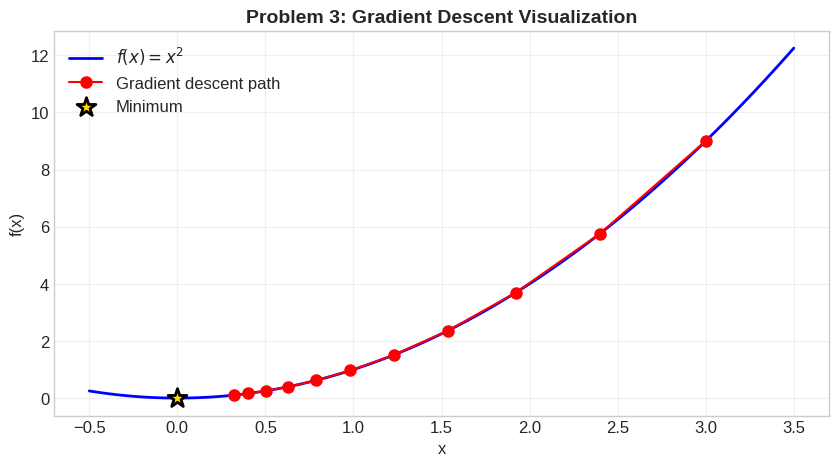

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✅ All problems solved!


In [17]:
# ✅ Solutions to Practice Problems

print("=" * 70)
print("SOLUTIONS TO PRACTICE PROBLEMS")
print("=" * 70)

print("""
📝 PROBLEM 1: Basic Partial Derivatives
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
f(x, y) = 3x²y + 2xy³ - x + 5

∂f/∂x = 6xy + 2y³ - 1   (treat y as constant)
∂f/∂y = 3x² + 6xy²      (treat x as constant)

At point (1, 2):
∂f/∂x = 6(1)(2) + 2(2)³ - 1 = 12 + 16 - 1 = 27
∂f/∂y = 3(1)² + 6(1)(2)² = 3 + 24 = 27

∇f(1, 2) = [27, 27]
""")

# Verify with numerical gradient
def f1(x, y):
    return 3*x**2*y + 2*x*y**3 - x + 5

h = 1e-7
x, y = 1, 2
df_dx = (f1(x+h, y) - f1(x-h, y)) / (2*h)
df_dy = (f1(x, y+h) - f1(x, y-h)) / (2*h)
print(f"✓ Numerical verification: ∇f(1,2) = [{df_dx:.4f}, {df_dy:.4f}]")

print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📝 PROBLEM 2: Chain Rule
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
z = e^(x² + y²)

Let u = x² + y², so z = e^u

By chain rule:
∂z/∂x = (dz/du)(∂u/∂x) = e^u · 2x = 2x·e^(x² + y²)
∂z/∂y = (dz/du)(∂u/∂y) = e^u · 2y = 2y·e^(x² + y²)

∇z = [2x·e^(x² + y²), 2y·e^(x² + y²)]
   = 2·e^(x² + y²)·[x, y]
""")

print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📝 PROBLEM 3: Gradient Descent
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
f(x) = x², f'(x) = 2x
Starting at x = 3, learning rate α = 0.1

Iteration 1: x = 3 - 0.1(2·3) = 3 - 0.6 = 2.4
Iteration 2: x = 2.4 - 0.1(2·2.4) = 2.4 - 0.48 = 1.92
Iteration 3: x = 1.92 - 0.1(2·1.92) = 1.92 - 0.384 = 1.536

After 3 iterations: x = 1.536
(Getting closer to minimum at x = 0!)
""")

# Visualize problem 3
x_vals = [3]
for _ in range(10):
    x_new = x_vals[-1] - 0.1 * 2 * x_vals[-1]
    x_vals.append(x_new)

x_range = np.linspace(-0.5, 3.5, 100)
plt.figure(figsize=(10, 5))
plt.plot(x_range, x_range**2, 'b-', linewidth=2, label='$f(x) = x^2$')
plt.plot(x_vals, [x**2 for x in x_vals], 'ro-', markersize=8, label='Gradient descent path')
plt.scatter([0], [0], color='gold', s=200, marker='*', edgecolors='black', 
            linewidths=2, zorder=5, label='Minimum')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Problem 3: Gradient Descent Visualization', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("✅ All problems solved!")

---
# 🏆 Summary: What We've Learned

## The Journey We Took:

1. **🧠 Intuition**: Gradients are like compasses pointing uphill
2. **📐 Mathematics**: From derivatives to partial derivatives to gradients
3. **📊 Visualization**: Seeing gradients as arrows perpendicular to contours
4. **🚀 Gradient Descent**: Using negative gradient to find minima
5. **⚙️ Learning Rate**: The critical hyperparameter
6. **🔧 Computation**: Analytical, numerical, and automatic methods
7. **🔗 Chain Rule**: The heart of backpropagation
8. **🤖 Machine Learning**: Linear regression and neural networks
9. **🎓 Advanced Topics**: Vanishing gradients, optimizers
---

## 💡 Key Takeaways:

> **"The gradient tells you the direction of steepest ascent. Go negative to descend!"**

1. **Gradient = Vector of partial derivatives**
2. **Gradient descent: $\theta_{new} = \theta_{old} - \alpha \nabla L$**
3. **Chain rule enables backpropagation**
4. **Learning rate is crucial - not too big, not too small**
5. **Modern optimizers (Adam) work better than vanilla GD**

---

## 🚀 Next Steps:

- Practice computing gradients by hand
- Implement gradient descent for different functions
- Learn PyTorch/TensorFlow for automatic differentiation
- Study more advanced optimization algorithms
- Apply to real machine learning problems!

---

_"Every expert was once a beginner. Keep practicing, and gradients will become second nature!"_ 🎓

**Thank you for learning with me! Good luck on your ML journey!** 🌟
